In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000, 784)


In [ ]:
input_img = Input(shape = (784,))
encoded = Dense(128, activation = 'sigmoid')(input_img)
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer = Adam(), loss = 'binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs = 5, shuffle = True, validation_data = (x_test, x_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.2397 - val_loss: 0.1342
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.1251 - val_loss: 0.1025
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0998 - val_loss: 0.0901
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0892 - val_loss: 0.0838
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0834 - val_loss: 0.0794


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


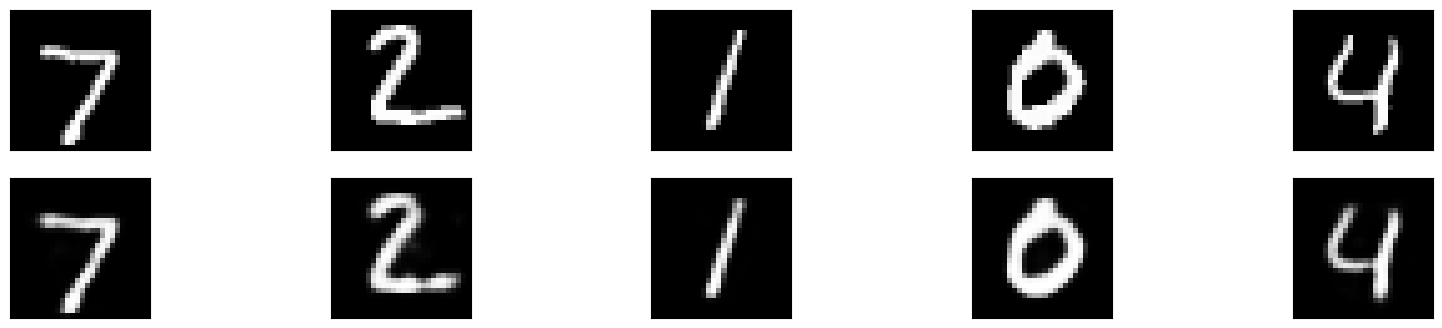

In [ ]:
import matplotlib.pyplot as plt

encoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
  #Original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()